## Usage Guide

This tutorial covers some basic usage patterns and best-practices to help you get started with Matplotlib

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### A simple example

Matplotlib graphs your data on Figures (i.e., windows, Jupyter widgets, etc.), each of which can contain one or more Axes (i.e., an area where points can be specified in terms of x-y coordinates (or theta-r in a polar plot, or x-y-z in a 3D plot, etc.). The most simple way of creating a figure with an axes is using pyplot.subplots. We can then use Axes.plot to draw some data on the axes:

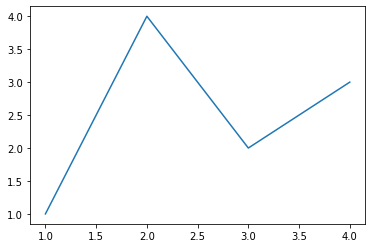

In [2]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Plot some data on the axes.

For each Axes graphing method, there is a corresponding function in the matplotlib.pyplot module that performs that plot on the "current" axes, creating that axes (and its parent figure) if they don't exist yet. So the previous example can be written more shortly as

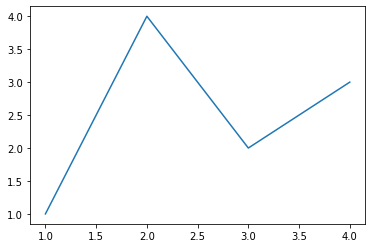

In [3]:
plt.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Matplotlib plot.

#### Figure

The whole figure. The figure keeps track of all the child Axes, a smattering of 'special' artists (titles, figure legends, etc), and the canvas. (Don't worry too much about the canvas, it is crucial as it is the object that actually does the drawing to get you your plot, but as the user it is more-or-less invisible to you). A figure can contain any number of Axes, but will typically have at least one.

The easiest way to create a new figure is with pyplot:

<Figure size 432x288 with 0 Axes>

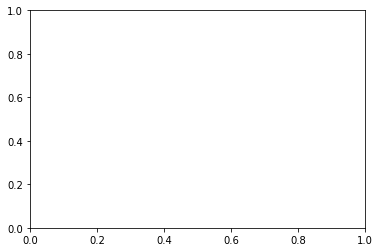

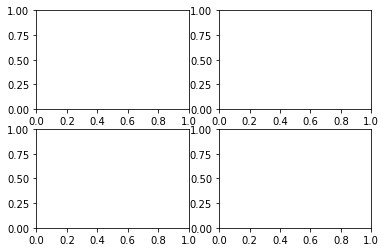

In [4]:
fig = plt.figure()  # an empty figure with no Axes
fig, ax = plt.subplots()  # a figure with a single Axes
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

It's convenient to create the axes together with the figure, but you can also add axes later on, allowing for more complex axes layouts

#### Axes

This is what you think of as 'a plot', it is the region of the image with the data space. A given figure can contain many Axes, but a given Axes object can only be in one Figure. The Axes contains two (or three in the case of 3D) Axis objects (be aware of the difference between Axes and Axis) which take care of the data limits (the data limits can also be controlled via the axes.Axes.set_xlim() and axes.Axes.set_ylim() methods). Each Axes has a title (set via set_title()), an x-label (set via set_xlabel()), and a y-label set via set_ylabel()).

The Axes class and its member functions are the primary entry point to working with the OO interface.

#### Axis

These are the number-line-like objects. They take care of setting the graph limits and generating the ticks (the marks on the axis) and ticklabels (strings labeling the ticks). The location of the ticks is determined by a Locator object and the ticklabel strings are formatted by a Formatter. The combination of the correct Locator and Formatter gives very fine control over the tick locations and labels.

#### Artist

Basically everything you can see on the figure is an artist (even the Figure, Axes, and Axis objects). This includes Text objects, Line2D objects, collections objects, Patch objects ... (you get the idea). When the figure is rendered, all of the artists are drawn to the canvas. Most Artists are tied to an Axes; such an Artist cannot be shared by multiple Axes, or moved from one to another.

### Types of inputs to plotting functions

All of plotting functions expect numpy.array or numpy.ma.masked_array as input. Classes that are 'array-like' such as pandas data objects and numpy.matrix may or may not work as intended. It is best to convert these to numpy.array objects prior to plotting.

For example, to convert a pandas.DataFrame

In [8]:
import pandas as pd
a = pd.DataFrame(np.random.rand(4, 5), columns = list('abcde'))
a

,a,b,c,d,e
0,0.411146,0.729735,0.421627,0.161416,0.806950
1,0.286247,0.204917,0.284886,0.141541,0.412872
2,0.489047,0.514373,0.344323,0.691424,0.283649
3,0.717516,0.510987,0.171328,0.275839,0.074634


In [9]:
a_asarray = a.values
a_asarray

array([[0.41114615, 0.72973516, 0.4216274 , 0.16141623, 0.8069496 ],
       [0.28624671, 0.20491717, 0.28488594, 0.14154097, 0.41287227],
       [0.48904714, 0.5143732 , 0.34432347, 0.69142374, 0.28364924],
       [0.71751638, 0.51098665, 0.17132751, 0.27583873, 0.07463357]])

and to convert a numpy.matrix

In [10]:
b = np.matrix([[1, 2], [3, 4]])
b

matrix([[1, 2],
        [3, 4]])

In [11]:
b_asarray = np.asarray(b)
b_asarray

array([[1, 2],
       [3, 4]])

### The object-oriented interface and the pyplot interface

As noted above, there are essentially two ways to use Matplotlib:

- Explicitly create figures and axes, and call methods on them (the "object-oriented (OO) style").
- Rely on pyplot to automatically create and manage the figures and axes, and use pyplot functions for plotting.

So one can do (OO-style)

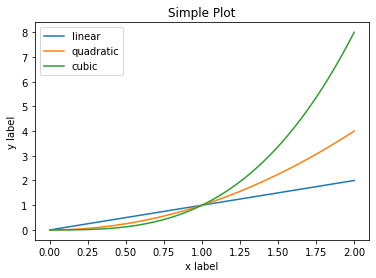

In [12]:
x = np.linspace(0, 2, 100)

# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()  # Add a legend.

or (pyplot-style)

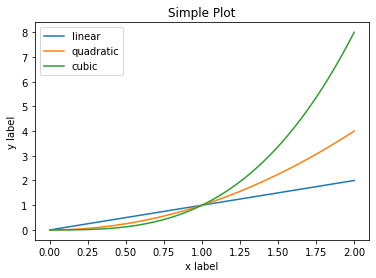

In [13]:
x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()

Actually there is a third approach, for the case where you are embedding Matplotlib in a GUI application, which completely drops pyplot, even for figure creation. We won't discuss it here; see the corresponding section in the gallery for more info (Embedding Matplotlib in graphical user interfaces).

Matplotlib's documentation and examples use both the OO and the pyplot approaches (which are equally powerful), and you should feel free to use either (however, it is preferable pick one of them and stick to it, instead of mixing them). In general, we suggest to restrict pyplot to interactive plotting (e.g., in a Jupyter notebook), and to prefer the OO-style for non-interactive plotting (in functions and scripts that are intended to be reused as part of a larger project).

#### Note

In older examples, you may find examples that instead used the so-called pylab interface, via from pylab import *. This star-import imports everything both from pyplot and from numpy, so that one could do

    x = linspace(0, 2, 100)
    plot(x, x, label='linear')
    ...

for an even more MATLAB-like style. This approach is strongly discouraged nowadays and deprecated; it is only mentioned here because you may still encounter it in the wild.

Typically one finds oneself making the same plots over and over again, but with different data sets, which leads to needing to write specialized functions to do the plotting. The recommended function signature is something like:

In [14]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

which you would then use as

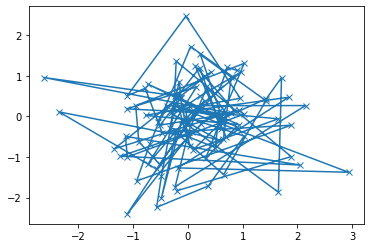

In [15]:
data1, data2, data3, data4 = np.random.randn(4, 100)
fig, ax = plt.subplots(1, 1)
my_plotter(ax, data1, data2, {'marker': 'x'})

or if you wanted to have 2 sub-plots:

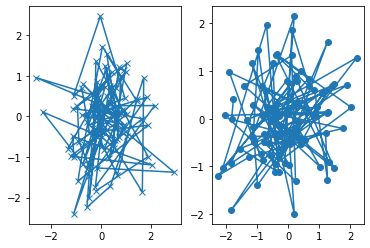

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2)
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'})

### Backends

#### What is a backend?

A lot of documentation on the website and in the mailing lists refers to the "backend" and many new users are confused by this term. matplotlib targets many different use cases and output formats. Some people use matplotlib interactively from the python shell and have plotting windows pop up when they type commands. Some people run Jupyter notebooks and draw inline plots for quick data analysis. Others embed matplotlib into graphical user interfaces like wxpython or pygtk to build rich applications. Some people use matplotlib in batch scripts to generate postscript images from numerical simulations, and still others run web application servers to dynamically serve up graphs.

To support all of these use cases, matplotlib can target different outputs, and each of these capabilities is called a backend; the "frontend" is the user facing code, i.e., the plotting code, whereas the "backend" does all the hard work behind-the-scenes to make the figure. There are two types of backends: user interface backends (for use in pygtk, wxpython, tkinter, qt4, or macosx; also referred to as "interactive backends") and hardcopy backends to make image files (PNG, SVG, PDF, PS; also referred to as "non-interactive backends").

#### Selecting a backend

There are three ways to configure your backend:

- The rcParams["backend"] (default: 'agg') parameter in your matplotlibrc file
- The MPLBACKEND environment variable
- The function matplotlib.use()

A more detailed description is given below.

If multiple of these are configurations are present, the last one from the list takes precedence; e.g. calling matplotlib.use() will override the setting in your matplotlibrc.

If no backend is explicitly set, Matplotlib automatically detects a usable backend based on what is available on your system and on whether a GUI event loop is already running. On Linux, if the environment variable DISPLAY is unset, the "event loop" is identified as "headless", which causes a fallback to a noninteractive backend (agg).

Here is a detailed description of the configuration methods:

1. Setting rcParams["backend"] (default: 'agg') in your matplotlibrc file:

`backend : qt5agg   # use pyqt5 with antigrain (agg) rendering`

See also Customizing Matplotlib with style sheets and rcParams.

2. Setting the MPLBACKEND environment variable:

You can set the environment variable either for your current shell or for a single script.

On Unix:

`> export MPLBACKEND=qt5agg`

`> python simple_plot.py`

`> MPLBACKEND=qt5agg python simple_plot.py`

On Windows, only the former is possible:

`> set MPLBACKEND=qt5agg`

`> python simple_plot.py`

Setting this environment variable will override the backend parameter in any matplotlibrc, even if there is a matplotlibrc in your current working directory. Therefore, setting MPLBACKEND globally, e.g. in your .bashrc or .profile, is discouraged as it might lead to counter-intuitive behavior.

3. If your script depends on a specific backend you can use the function matplotlib.use():

`import matplotlib
 matplotlib.use('qt5agg')`

This should be done before any figure is created; otherwise Matplotlib may fail to switch the backend and raise an ImportError.

Using use will require changes in your code if users want to use a different backend. Therefore, you should avoid explicitly calling use unless absolutely necessary.

#### The builtin backends

By default, Matplotlib should automatically select a default backend which allows both interactive work and plotting from scripts, with output to the screen and/or to a file, so at least initially you will not need to worry about the backend. The most common exception is if your Python distribution comes without tkinter and you have no other GUI toolkit installed; this happens on certain Linux distributions, where you need to install a Linux package named python-tk (or similar).

If, however, you want to write graphical user interfaces, or a web application server (How to use Matplotlib in a web application server), or need a better understanding of what is going on, read on. To make things a little more customizable for graphical user interfaces, matplotlib separates the concept of the renderer (the thing that actually does the drawing) from the canvas (the place where the drawing goes). The canonical renderer for user interfaces is Agg which uses the Anti-Grain Geometry C++ library to make a raster (pixel) image of the figure; it is used by the Qt5Agg, Qt4Agg, GTK3Agg, wxAgg, TkAgg, and macosx backends. An alternative renderer is based on the Cairo library, used by Qt5Cairo, Qt4Cairo, etc.

For the rendering engines, one can also distinguish between vector or raster renderers. Vector graphics languages issue drawing commands like "draw a line from this point to this point" and hence are scale free, and raster backends generate a pixel representation of the line whose accuracy depends on a DPI setting.

Here is a summary of the matplotlib renderers (there is an eponymous backend for each; these are non-interactive backends, capable of writing to a file):

    Renderer  Filetypes           Description
    AGG       png 	              raster graphics -- high quality images using the Anti-Grain Geometry engine
    PDF 	  pdf 	              vector graphics -- Portable Document Format
    PS 	      ps, eps             vector graphics -- Postscript output
    SVG 	  svg 	              vector graphics -- Scalable Vector Graphics
    PGF 	  pgf, pdf 	          vector graphics -- using the pgf package
    Cairo 	  png, ps, pdf, svg   raster or vector graphics -- using the Cairo library

To save plots using the non-interactive backends, use the matplotlib.pyplot.savefig('filename') method.

And here are the user interfaces and renderer combinations supported; these are interactive backends, capable of displaying to the screen and of using appropriate renderers from the table above to write to a file:

    Backend 	Description
    Qt5Agg 	 Agg rendering in a Qt5 canvas (requires PyQt5). This backend can be activated in IPython with %matplotlib qt5.
    
    ipympl 	 Agg rendering embedded in a Jupyter widget. (requires ipympl). This backend can be enabled in a Jupyter notebook with %matplotlib ipympl.
    
    GTK3Agg 	Agg rendering to a GTK 3.x canvas (requires PyGObject, and pycairo or cairocffi). This backend can be activated in IPython with %matplotlib gtk3.
    
    macosx 	 Agg rendering into a Cocoa canvas in OSX. This backend can be activated in IPython with %matplotlib osx.
    
    TkAgg 	  Agg rendering to a Tk canvas (requires TkInter). This backend can be activated in IPython with %matplotlib tk.
    
    nbAgg 	 Embed an interactive figure in a Jupyter classic notebook. This backend can be enabled in Jupyter notebooks via %matplotlib notebook.
    
    WebAgg 	On show() will start a tornado server with an interactive figure.
    
    GTK3Cairo 	Cairo rendering to a GTK 3.x canvas (requires PyGObject, and pycairo or cairocffi).
    
    Qt4Agg 	 Agg rendering to a Qt4 canvas (requires PyQt4 or pyside). This backend can be activated in IPython with %matplotlib qt4.
    
    wxAgg 	 Agg rendering to a wxWidgets canvas (requires wxPython 4). This backend can be activated in IPython with %matplotlib wx.
    

##### Note

The names of builtin backends case-insensitive; e.g., 'Qt5Agg' and 'qt5agg' are equivalent.

##### ipympl

The Jupyter widget ecosystem is moving too fast to support directly in Matplotlib. To install ipympl

`pip install ipympl
 jupyter nbextension enable --py --sys-prefix ipympl`

or

`conda install ipympl -c conda-forge`

See jupyter-matplotlib for more details.

###### How do I select PyQt4 or PySide?

The QT_API environment variable can be set to either pyqt or pyside to use PyQt4 or PySide, respectively.

Since the default value for the bindings to be used is PyQt4, Matplotlib first tries to import it, if the import fails, it tries to import PySide.

#### Using non-builtin backends

More generally, any importable backend can be selected by using any of the methods above. If name.of.the.backend is the module containing the backend, use module://name.of.the.backend as the backend name, e.g. matplotlib.use('module://name.of.the.backend').

### What is interactive mode?

Use of an interactive backend (see What is a backend?) permits--but does not by itself require or ensure--plotting to the screen. Whether and when plotting to the screen occurs, and whether a script or shell session continues after a plot is drawn on the screen, depends on the functions and methods that are called, and on a state variable that determines whether matplotlib is in "interactive mode". The default Boolean value is set by the matplotlibrc file, and may be customized like any other configuration parameter (see Customizing Matplotlib with style sheets and rcParams). It may also be set via matplotlib.interactive(), and its value may be queried via matplotlib.is_interactive(). Turning interactive mode on and off in the middle of a stream of plotting commands, whether in a script or in a shell, is rarely needed and potentially confusing, so in the following we will assume all plotting is done with interactive mode either on or off.

Interactive mode may also be turned on via matplotlib.pyplot.ion(), and turned off via matplotlib.pyplot.ioff().

#### Interactive example

From an ordinary python prompt, or after invoking ipython with no options, try this:

`import matplotlib.pyplot as plt
 plt.ion()
 plt.plot([1.6, 2.7])`

This will pop up a plot window. Your terminal prompt will remain active, so that you can type additional commands such as:

`plt.title("interactive test")
 plt.xlabel("index")`

On most interactive backends, the figure window will also be updated if you change it via the object-oriented interface. E.g. get a reference to the Axes instance, and call a method of that instance:

`ax = plt.gca()
 ax.plot([3.1, 2.2])`

If you are using certain backends (like macosx), or an older version of matplotlib, you may not see the new line added to the plot immediately. In this case, you need to explicitly call draw() in order to update the plot:

`plt.draw()`

#### Non-interactive example

Start a fresh session as in the previous example, but now turn interactive mode off:

`import matplotlib.pyplot as plt
 plt.ioff()
 plt.plot([1.6, 2.7])`

Nothing happened--or at least nothing has shown up on the screen (unless you are using macosx backend, which is anomalous). To make the plot appear, you need to do this:

`plt.show()`

Now you see the plot, but your terminal command line is unresponsive; pyplot.show() blocks the input of additional commands until you manually kill the plot window.

What good is this--being forced to use a blocking function? Suppose you need a script that plots the contents of a file to the screen. You want to look at that plot, and then end the script. Without some blocking command such as show(), the script would flash up the plot and then end immediately, leaving nothing on the screen.

In addition, non-interactive mode delays all drawing until show() is called; this is more efficient than redrawing the plot each time a line in the script adds a new feature.

Prior to version 1.0, show() generally could not be called more than once in a single script (although sometimes one could get away with it); for version 1.0.1 and above, this restriction is lifted, so one can write a script like this:

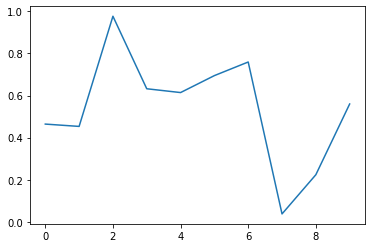

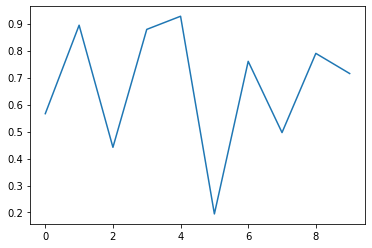

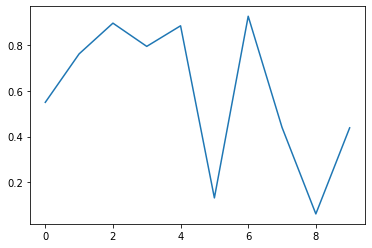

In [21]:
import numpy as np
import matplotlib.pyplot as plt

plt.ioff()
for i in range(3):
    plt.plot(np.random.rand(10))
    plt.show()

which makes three plots, one at a time. I.e. the second plot will show up, once the first plot is closed.

#### Summary

In interactive mode, pyplot functions automatically draw to the screen.

When plotting interactively, if using object method calls in addition to pyplot functions, then call draw() whenever you want to refresh the plot.

Use non-interactive mode in scripts in which you want to generate one or more figures and display them before ending or generating a new set of figures. In that case, use show() to display the figure(s) and to block execution until you have manually destroyed them.

#### Using the fast style

The fast style can be used to automatically set simplification and chunking parameters to reasonable settings to speed up plotting large amounts of data. It can be used simply by running:

`import matplotlib.style as mplstyle
 mplstyle.use('fast')`

It is very light weight, so it plays nicely with other styles, just make sure the fast style is applied last so that other styles do not overwrite the settings:

`mplstyle.use(['dark_background', 'ggplot', 'fast'])`